<a href="https://colab.research.google.com/github/shaheerzubery/Deeplearning/blob/main/CIFAR_10_image_classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 5.7 kB/s 
     |████████████████████████████████| 5.8 MB 17.3 MB/s 
     |████████████████████████████████| 438 kB 48.9 MB/s 
     |████████████████████████████████| 1.6 MB 44.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

In [2]:
import tensorflow
from tensorflow import keras
print("tensorflow version", tensorflow.__version__)
print("keras version", keras.__version__)

tensorflow version 2.9.1
keras version 2.9.0


In [3]:
!pip install -q kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shaheerzubairi","key":"492fa9479062d7dc24b4f8c554a3fd63"}'}

In [14]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
#copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [20]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

## **Prepare Data (Preprocessing)**

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline

import numpy as np



In [17]:
print(f'Shape of training data: {x_train.shape}')
print(f'Shape of training labels: {y_train.shape}')
print(f'Number of training samples: {x_train.shape[0]}')
print(15 * '-')
print(f'Shape of testing data: {x_test.shape}')
print(f'Shape of testing labels: {y_test.shape}')
print(f'Number of testing samples: {x_test.shape[0]}')
print(15 * '-')
print(f'Size of images: {x_train.shape[1:4]}')

Shape of training data: (50000, 32, 32, 3)
Shape of training labels: (50000, 1)
Number of training samples: 50000
---------------
Shape of testing data: (10000, 32, 32, 3)
Shape of testing labels: (10000, 1)
Number of testing samples: 10000
---------------
Size of images: (32, 32, 3)


In [18]:
index_to_name = {0:'Airplane', 1:'Car', 2:'Bird',
                 3:'Cat', 4:'Deer', 5:'Dog',
                 6:'Frog', 7:'Horse', 8:'Ship',
                 9:'Truck'}

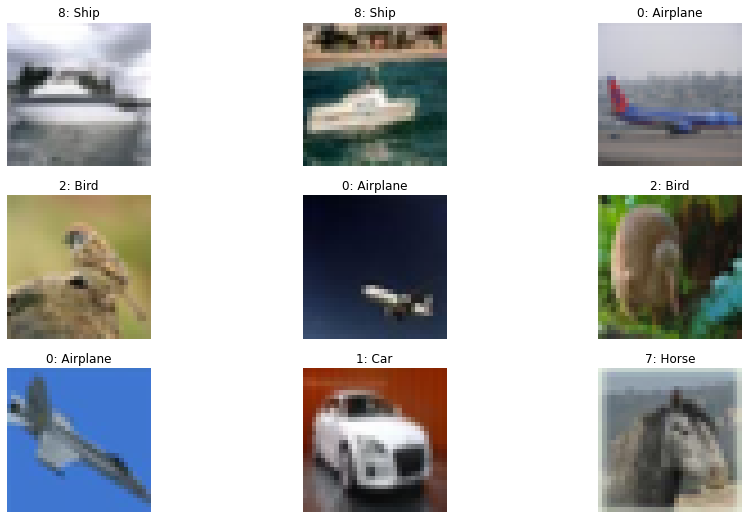

In [19]:
plt.figure(figsize = (15, 9))
for num, i in enumerate(np.random.randint(x_train.shape[0],size = 9)):
    plt.subplot(3,3, num + 1)
    plt.imshow(x_train[i])
    class_index = np.squeeze(y_train[i][0]).astype(int)
    plt.title(f'{class_index}: {index_to_name[class_index]}')
    plt.axis('off')

## **CNN MODAL**

In [30]:
from keras.applications.mobilenet_v2 import preprocess_input, MobileNetV2
from keras.layers import BatchNormalization, Conv2D, Dense,Dropout, Flatten, GlobalAveragePooling2D, MaxPool2D, RandomFlip, RandomRotation, ReLU, Rescaling

def make_base_model():
    inputs = keras.Input(shape = (32, 32, 3)) 
    x = Rescaling(1. / 255)(inputs)
    x = RandomFlip()(x)
    x = RandomRotation(0.2, fill_mode = 'nearest')(x)
    x = Conv2D(filters = 8, kernel_size =  2, strides = 2)(x)
    x = ReLU()(x)
    x = BatchNormalization(axis = -1)(x)
    x = MaxPool2D(pool_size = 2, strides = 2)(x)
    x = ReLU()(x)
    x = Conv2D(filters = 16, kernel_size =  2, strides = 2, padding = 'same')(x)
    x = ReLU()(x)
    x = BatchNormalization(axis = -1)(x)
    x = MaxPool2D(pool_size = 4, strides = 4)(x)
    x = Flatten()(x)
    x = Dropout(0.2)(x)
    outputs = Dense(10, activation = 'softmax')(x)
    model = keras.Model(inputs = inputs, outputs = outputs, name = 'base_model')
    
    return model   

base_model = make_base_model()
base_model.summary()

Model: "base_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 random_flip (RandomFlip)    (None, 32, 32, 3)         0         
                                                                 
 random_rotation (RandomRota  (None, 32, 32, 3)        0         
 tion)                                                           
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 8)         104       
                                                                 
 re_lu (ReLU)                (None, 16, 16, 8)         0         
                                                        

In [31]:
base_model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath = 'best_base_model.keras',
    save_best_only = True,
    monitor = 'val_accuracy')
]

epochs = 20

history = base_model.fit(
    x_train,
    y_train,
    batch_size = 32,
    epochs = epochs,
    shuffle = True,
    validation_split= 0.2,
    callbacks = callbacks
)

Epoch 1/20
1250/1250 [==============================] - 25s 19ms/step - loss: 2.3510 - accuracy: 0.1839 - val_loss: 2.0584 - val_accuracy: 0.2300
Epoch 2/20
1250/1250 [==============================] - 31s 25ms/step - loss: 2.0527 - accuracy: 0.2301 - val_loss: 1.9861 - val_accuracy: 0.2570
Epoch 3/20
1250/1250 [==============================] - 30s 24ms/step - loss: 1.9869 - accuracy: 0.2580 - val_loss: 1.9136 - val_accuracy: 0.3007
Epoch 4/20
1250/1250 [==============================] - 31s 25ms/step - loss: 1.9542 - accuracy: 0.2759 - val_loss: 1.9167 - val_accuracy: 0.2936
Epoch 5/20
1250/1250 [==============================] - 34s 27ms/step - loss: 1.9229 - accuracy: 0.2903 - val_loss: 1.8718 - val_accuracy: 0.3176
Epoch 6/20
1250/1250 [==============================] - 33s 26ms/step - loss: 1.9117 - accuracy: 0.2946 - val_loss: 2.0960 - val_accuracy: 0.2562
Epoch 7/20
1250/1250 [==============================] - 26s 21ms/step - loss: 1.9017 - accuracy: 0.3042 - val_loss: 1.8317 -

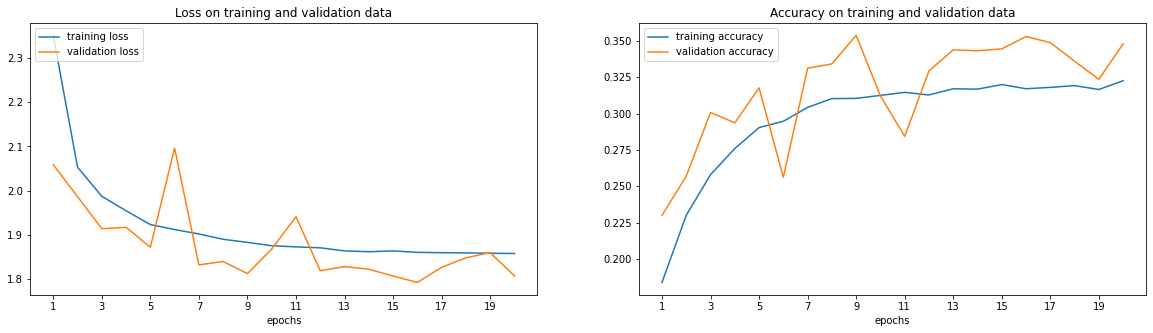

In [37]:
import seaborn as sns
def plot_history(history_of_model):
    plt.figure(figsize = (20, 5))
    
    plt.subplot(1, 2, 1)
    plt.title('Loss on training and validation data')
    sns.lineplot(x = range(1, epochs + 1), y = history_of_model.history['loss'])
    sns.lineplot(x = range(1, epochs + 1), y = history_of_model.history['val_loss'])
    plt.xlabel('epochs')
    plt.xticks(list(range(1, epochs + 1))[::2])
    plt.legend(['training loss', 'validation loss'], loc = 'upper left')
    
    plt.subplot(1, 2, 2)
    plt.title('Accuracy on training and validation data')
    sns.lineplot(x = range(1, epochs + 1), y = history_of_model.history['accuracy'])
    sns.lineplot(x = range(1, epochs + 1), y = history_of_model.history['val_accuracy'])
    plt.xlabel('epochs')
    plt.xticks(list(range(1, epochs + 1))[::2])
    plt.legend(['training accuracy', 'validation accuracy'], loc = 'upper left')
    
    plt.show() 
    
plot_history(history) 